# Feature Engineering Regression

## Import libraries

In [1]:
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Load preprocessed data

In [2]:
with open('preprocessed_data.pkl', 'rb') as f:
    preprocessed_data = pickle.load(f)

X_scaled = preprocessed_data['X_scaled']
y = preprocessed_data['y']

## Apply PCA

In [4]:
# User-defined number of components
n_components = 10  # Change this value as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [5]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Principal Components:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.2%}")

Explained Variance by Principal Components:
PC1: 40.24%
PC2: 14.92%
PC3: 12.06%
PC4: 9.55%
PC5: 6.62%
PC6: 6.03%
PC7: 5.37%
PC8: 4.34%
PC9: 0.78%
PC10: 0.09%


## Save PCA-transformed data

In [6]:
pca_data = {
    "X_pca": X_pca,
    "X_raw": preprocessed_data['X_raw'],
    "y": preprocessed_data['y']
}

with open('pca_data.pkl', 'wb') as f:
    pickle.dump(pca_data, f)

print("PCA-transformed data saved.")

PCA-transformed data saved.


## Plot first two principal components

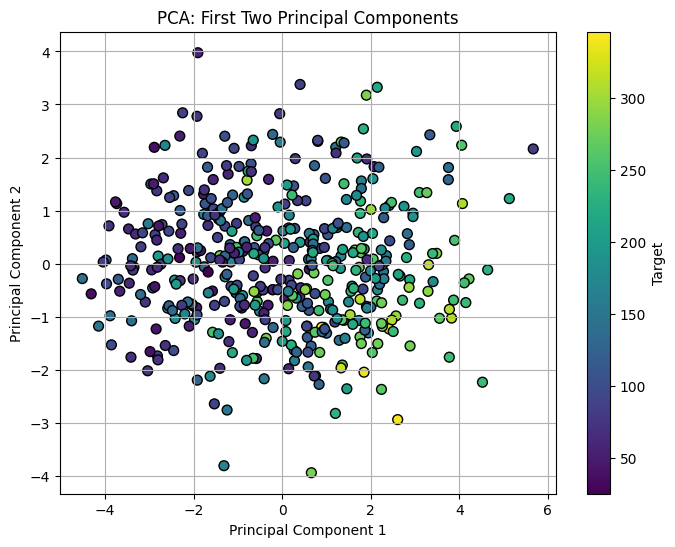

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()